In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import yt
ds = yt.load("datacubes/flarecs-id.0035.vtk")

yt : [INFO     ] 2022-10-13 19:04:29,676 Temporarily setting domain_right_edge = -domain_left_edge. This will be corrected automatically if it is not the case.
yt : [WARNING  ] 2022-10-13 19:04:29,677 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2022-10-13 19:04:29,677 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2022-10-13 19:04:29,678 Assuming 1.0 = 1.0 g
yt : [INFO     ] 2022-10-13 19:04:29,716 Parameters: current_time              = 3.500282
yt : [INFO     ] 2022-10-13 19:04:29,717 Parameters: domain_dimensions         = [579   0 288]
yt : [INFO     ] 2022-10-13 19:04:29,717 Parameters: domain_left_edge          = [-0.5   0.   -0.25]
yt : [INFO     ] 2022-10-13 19:04:29,717 Parameters: domain_right_edge         = [ 0.5  -0.    0.25]
yt : [INFO     ] 2022-10-13 19:04:29,718 Parameters: cosmological_simulation   = 0


**Inspecting datacube**

In [3]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	      96049152	           458
----------------------------------------------
   	     1	      96049152


t = 3.50028200e+00 = 3.50028200e+00 s = 1.10917243e-07 years

Smallest Cell:
	Width: 5.597e-28 Mpc Mpc
	Width: 5.597e-22 pc pc
	Width: 1.155e-16 AU AU
	Width: 1.727e-03 cm cm


In [4]:
ds.field_list

[('athena', 'cell_centered_B_x'),
 ('athena', 'cell_centered_B_y'),
 ('athena', 'cell_centered_B_z'),
 ('athena', 'density'),
 ('athena', 'momentum_x'),
 ('athena', 'momentum_y'),
 ('athena', 'momentum_z'),
 ('athena', 'scalar[0]'),
 ('athena', 'scalar[1]'),
 ('athena', 'total_energy')]

In [9]:
print(ds.domain_width.in_units("meter"))

[0.01  0.01  0.005] m


In [21]:
print(ds.particle_types)
print(ds.particle_types_raw)
print(ds.particle_type_counts)

print(ds.index.grid_left_edge)
ds.index.grids[0]

g = ds.index.grids[0]
g.ActiveDimensions
g.LeftEdge, g.RightEdge
g.Level
g.Children

('io',)
('io',)
{}
[[-0.5   0.   -0.25]] code_length


[]

**Simple visualization**
Using yt's plotting functionality

In [80]:
p = yt.ProjectionPlot(ds, 'z', ('athena', 'density'))

yt : [INFO     ] 2022-10-13 21:27:06,674 Projection completed
yt : [INFO     ] 2022-10-13 21:27:06,674 xlim = -0.500000 0.500000
yt : [INFO     ] 2022-10-13 21:27:06,675 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-13 21:27:06,675 xlim = -0.500000 0.500000
yt : [INFO     ] 2022-10-13 21:27:06,676 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-13 21:27:06,677 Making a fixed resolution buffer of (('athena', 'density')) 800 by 800


/home/ivan/.local/lib/python3.8/site-packages/yt/visualization/plot_modifications.py:961: RuntimeWarning: invalid value encountered in log10
  zi = np.log10(zi)



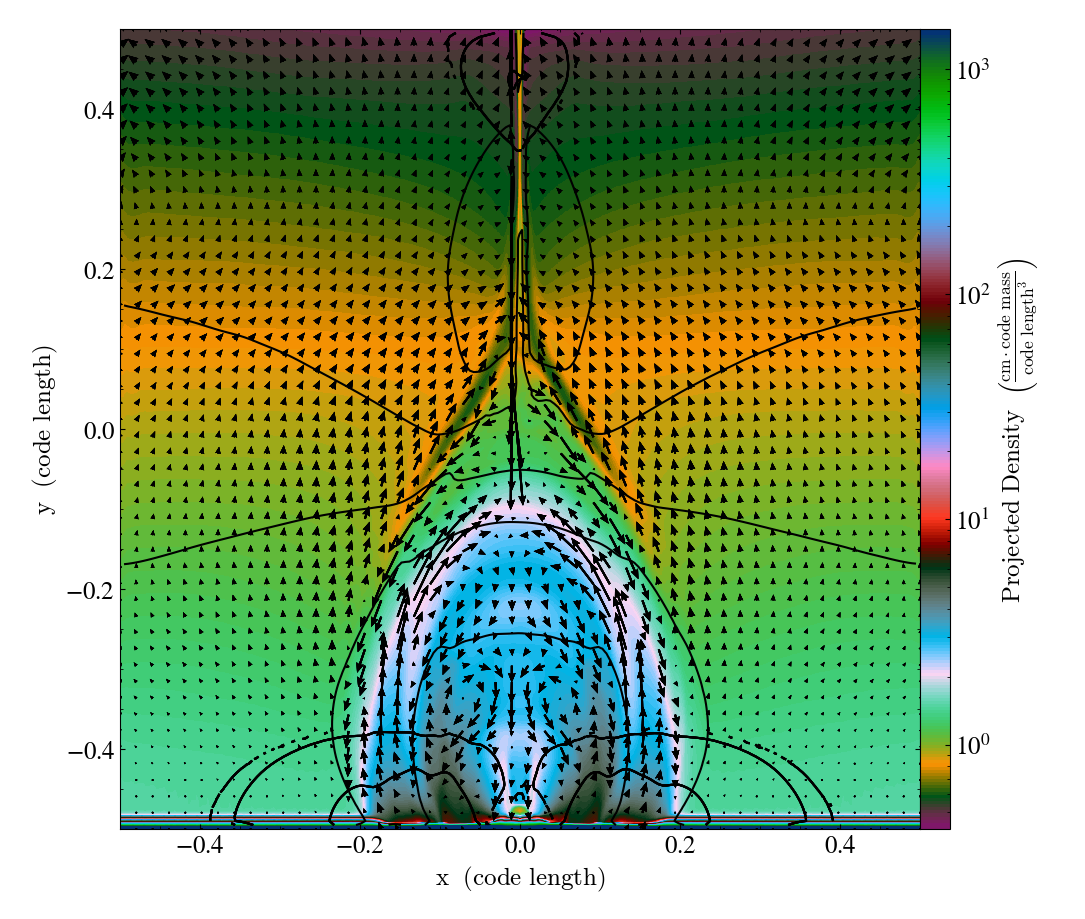

In [87]:
p.set_cmap(('athena', 'density'), 'Hardcandy_r')
p.set_zlim(('athena', 'density'), zmax=(1.5e3))
p.save()
p.annotate_contour(('athena', 'cell_centered_B_x'))
p.annotate_velocity(headwidth=4)
p.show()

In [51]:
# Create a volume rendering
sc = yt.create_scene(ds, field=('athena', 'density'))
# Now increase the resolution
sc.camera.resolution = (512, 512)
# Set the camera focus to a position that is offset from the center of
# the domain
sc.camera.focus = ds.arr([0.001, 0.001, 0.001], "unitary")
# Move the camera position to the other side of the dataset
sc.camera.position = ds.arr([-1, -1, -1], "unitary")
#sc.switch_orientation()
# save to disk with a custom filename and apply sigma clipping to eliminate
# very bright pixels, producing an image with better contrast.
sc.render()
sc.save("custom.png", sigma_clip=4)

AttributeError: 'Scene' object has no attribute 'switch_orientation'

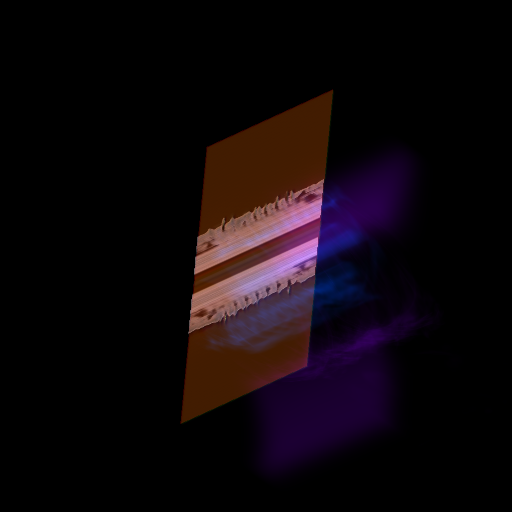

In [50]:
sc.show()

yt : [INFO     ] 2022-10-13 19:08:42,171 Projection completed
yt : [INFO     ] 2022-10-13 19:08:42,172 xlim = -0.250000 0.250000
yt : [INFO     ] 2022-10-13 19:08:42,172 ylim = -0.500000 0.500000
yt : [INFO     ] 2022-10-13 19:08:42,173 xlim = -0.250000 0.250000
yt : [INFO     ] 2022-10-13 19:08:42,174 ylim = -0.500000 0.500000
yt : [INFO     ] 2022-10-13 19:08:42,175 Making a fixed resolution buffer of (('athena', 'density')) 800 by 800



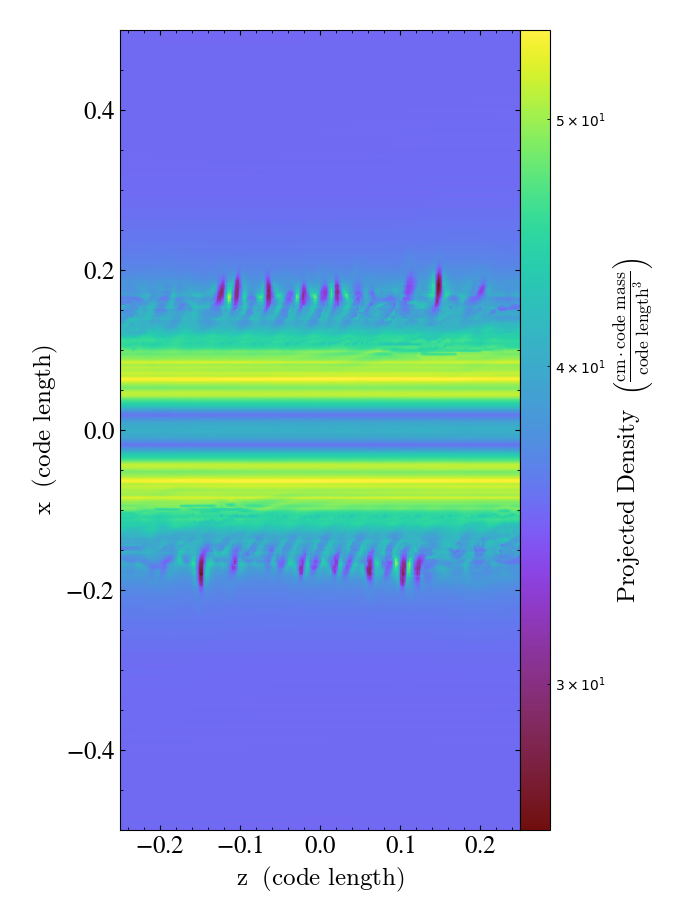

In [23]:
p = yt.ProjectionPlot(ds, 'y', ('athena', 'density'))
p.show()

*Export to matplotlib*
We can export data arrays of arbitrary shapes

In [54]:
import numpy as np
from matplotlib.colors import LogNorm
#import yt
from yt.visualization.api import get_multi_plot

#fn = "Enzo_64/RD0006/RedshiftOutput0006"  # dataset to load

# load data and get center value and center location as maximum density location
#ds = yt.load(fn)
v, c = ds.find_max(('athena', 'density'))

# set up our Fixed Resolution Buffer parameters: a width, resolution, and center
width = (1.0, "unitary")
res = [512, 512]
#  get_multi_plot returns a containing figure, a list-of-lists of axes
#   into which we can place plots, and some axes that we'll put
#   colorbars.

#  it accepts: # of x-axis plots, # of y-axis plots, and how the
#  colorbars are oriented (this also determines where they go: below
#  in the case of 'horizontal', on the right in the case of
#  'vertical'), bw is the base-width in inches (4 is about right for
#  most cases)

orient = "horizontal"
fig, axes, colorbars = get_multi_plot(2, 3, colorbar=orient, bw=6)

# Now we follow the method of "multi_plot.py" but we're going to iterate
# over the columns, which will become axes of slicing.
plots = []
for ax in range(3):
    sli = ds.slice(ax, c[ax])
    frb = sli.to_frb(width, res)
    den_axis = axes[ax][0]
    temp_axis = axes[ax][1]

    # here, we turn off the axes labels and ticks, but you could
    # customize further.
    for ax in (den_axis, temp_axis):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    # converting our fixed resolution buffers to NDarray so matplotlib can
    # render them
    dens = np.array(frb[('athena', 'density')])
    temp = np.array(frb[('athena', 'total_energy')])

    plots.append(den_axis.imshow(dens, norm=LogNorm()))
    plots[-1].set_clim((1e0, 1e1))
    plots[-1].set_cmap("bds_highcontrast")

    plots.append(temp_axis.imshow(temp, norm=LogNorm()))
    plots[-1].set_clim((0.5, 4))
    plots[-1].set_cmap("hot")

# Each 'cax' is a colorbar-container, into which we'll put a colorbar.
# the zip command creates triples from each element of the three lists
# .  Note that it cuts off after the shortest iterator is exhausted,
# in this case, titles.
titles = [
    r"$\mathrm{density}\ (\mathrm{g\ cm^{-3}})$",
    r"$\mathrm{total energy}\ (\mathrm{K})$",
]
for p, cax, t in zip(plots, colorbars, titles):
    # Now we make a colorbar, using the 'image' we stored in plots
    # above. note this is what is *returned* by the imshow method of
    # the plots.
    cbar = fig.colorbar(p, cax=cax, orientation=orient)
    cbar.set_label(t)

# And now we're done!
fig.savefig(f"{ds}_3x2.png")

yt : [INFO     ] 2022-10-13 21:11:28,335 max value is 1.76771e+04 at -0.1675301700000000 0.0008680555000000 0.0720485905000000
yt : [INFO     ] 2022-10-13 21:11:28,410 Making a fixed resolution buffer of (('athena', 'density')) 512 by 512
yt : [INFO     ] 2022-10-13 21:11:28,796 Making a fixed resolution buffer of (('athena', 'total_energy')) 512 by 512
yt : [INFO     ] 2022-10-13 21:11:29,062 Making a fixed resolution buffer of (('athena', 'density')) 512 by 512
yt : [INFO     ] 2022-10-13 21:11:29,449 Making a fixed resolution buffer of (('athena', 'total_energy')) 512 by 512
yt : [INFO     ] 2022-10-13 21:11:29,683 Making a fixed resolution buffer of (('athena', 'density')) 512 by 512
yt : [INFO     ] 2022-10-13 21:11:30,114 Making a fixed resolution buffer of (('athena', 'total_energy')) 512 by 512


In [59]:
dens.shape

(512, 512)

In [72]:
print(type(dens))
dens[:10,:10]

<class 'numpy.ndarray'>


array([[1.00742000e+04, 1.00166895e+04, 1.00846849e+04, 1.00827453e+04,
        1.00821410e+04, 1.00832437e+04, 1.01459894e+04, 1.01037981e+04,
        1.00077307e+04, 1.00856805e+04],
       [4.24308376e+03, 4.27218657e+03, 4.24221963e+03, 4.23716811e+03,
        4.23490278e+03, 4.23171758e+03, 4.18975568e+03, 4.22998533e+03,
        4.27883553e+03, 4.24604309e+03],
       [1.63541484e+03, 1.65743736e+03, 1.63722569e+03, 1.63493740e+03,
        1.63552044e+03, 1.63526059e+03, 1.60777001e+03, 1.62646513e+03,
        1.66454821e+03, 1.64068654e+03],
       [6.27388936e+02, 6.30877853e+02, 6.28029106e+02, 6.28937708e+02,
        6.30073184e+02, 6.30503911e+02, 6.28352440e+02, 6.28561745e+02,
        6.34165962e+02, 6.29849927e+02],
       [2.51791538e+02, 2.49961500e+02, 2.51911560e+02, 2.53320168e+02,
        2.54028688e+02, 2.54739038e+02, 2.58185347e+02, 2.55165270e+02,
        2.50814613e+02, 2.52542217e+02],
       [9.74962087e+01, 9.61766565e+01, 9.74225208e+01, 9.82820442e+01,
   